# CLV and Churn Prediction Analysis

### Importing Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

clv_df = pd.read_csv('../data/processed_data/predicted_clv.csv')
churn_df = pd.read_csv('../data/processed_data/predicted_churn.csv')
clv_df['recency'] = clv_df['recency'] * -1

### Predicted Spend over Recency, Frequency, Avg Spend, Total Spend

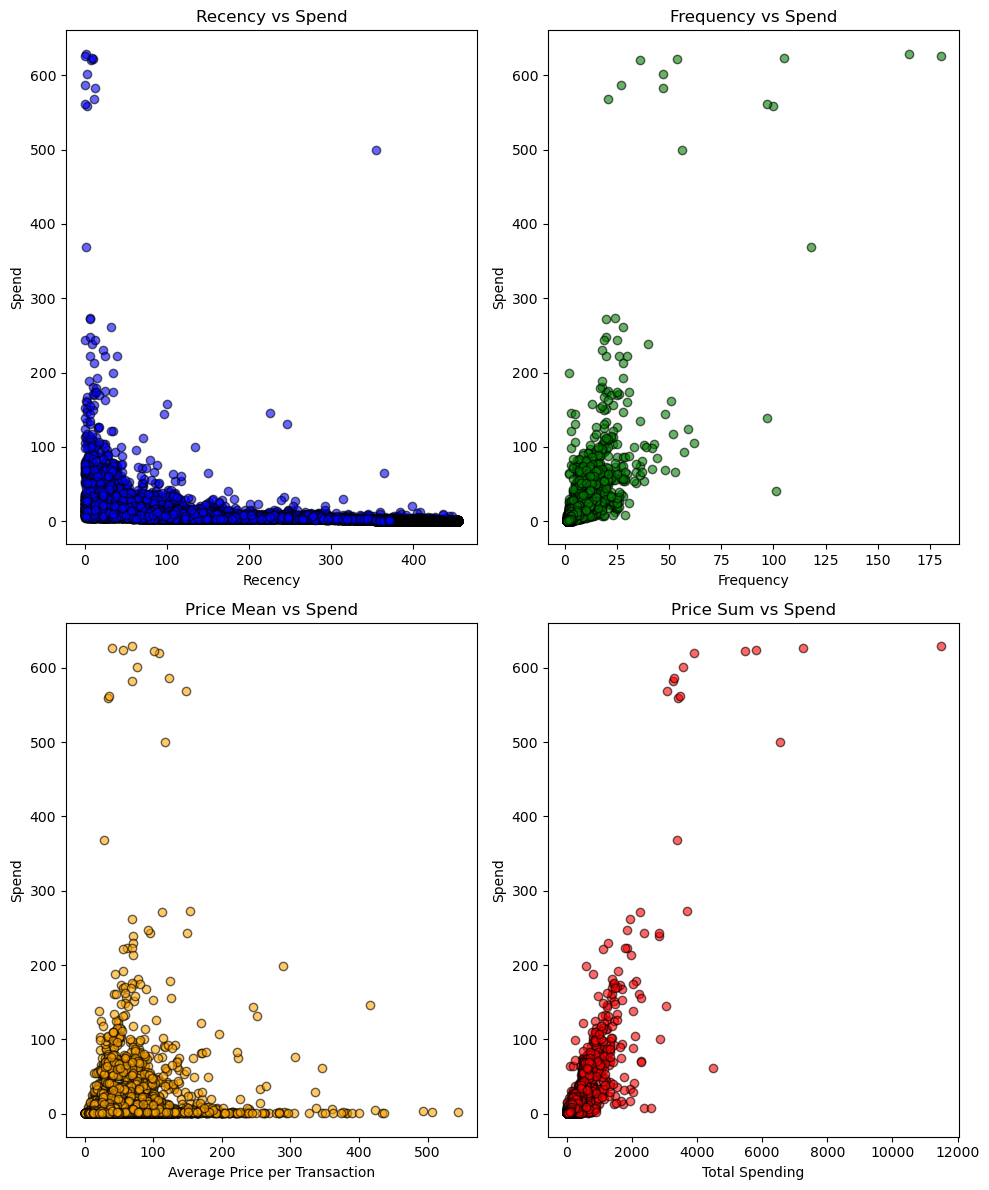

In [2]:
plt.figure(figsize=(10, 12))

plt.subplot(2, 2, 1)
plt.scatter(clv_df['recency'], clv_df['spend_90_total'], alpha=0.6, color='blue', edgecolor='black')
plt.title('Recency vs Spend')
plt.xlabel('Recency')
plt.ylabel('Spend')

plt.subplot(2, 2, 2)
plt.scatter(clv_df['frequency'], clv_df['spend_90_total'], alpha=0.6, color='green', edgecolor='black')
plt.title('Frequency vs Spend')
plt.xlabel('Frequency')
plt.ylabel('Spend')

plt.subplot(2, 2, 3)
plt.scatter(clv_df['price_mean'], clv_df['spend_90_total'], alpha=0.6, color='orange', edgecolor='black')
plt.title('Price Mean vs Spend')
plt.xlabel('Average Price per Transaction')
plt.ylabel('Spend')

plt.subplot(2, 2, 4)
plt.scatter(clv_df['price_sum'], clv_df['spend_90_total'], alpha=0.6, color='red', edgecolor='black')
plt.title('Price Sum vs Spend')
plt.xlabel('Total Spending')
plt.ylabel('Spend')

plt.tight_layout()
plt.savefig('../visuals/predicted_spend_vs_features.png')
plt.show()

### Correlation Heatmap between all the Features and Predicted Spend

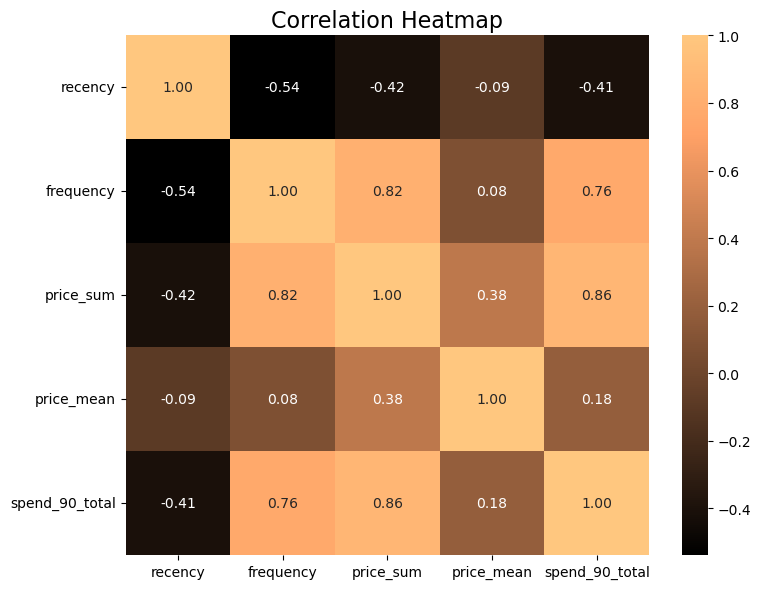

In [3]:
plt.figure(figsize=(8, 6))
correlation_matrix = clv_df[['recency', 'frequency', 'price_sum', 'price_mean', 'spend_90_total']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='copper', cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.savefig('../visuals/predicted_clv_correlation_heatmap.png')

### Distribution of Customer Spending

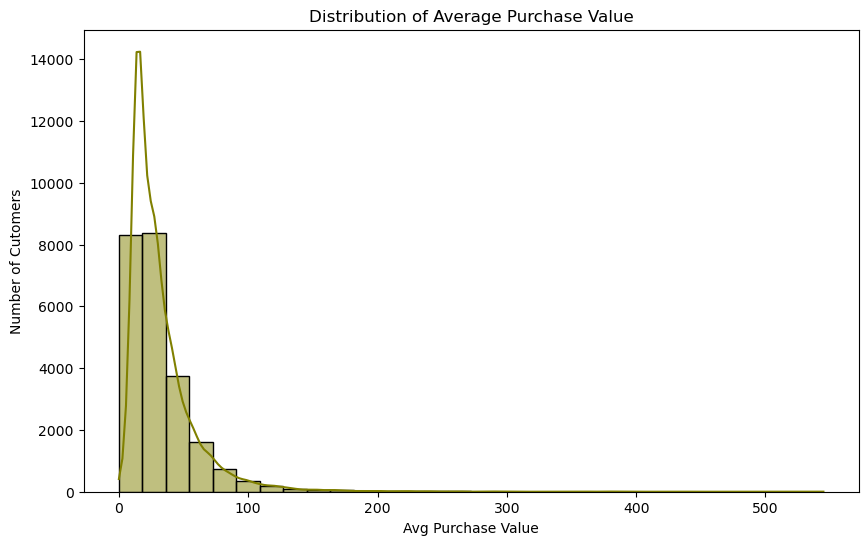

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(data=clv_df, x='price_mean', bins=30, kde=True, color='olive')
plt.title('Distribution of Average Purchase Value', fontsize=12)
plt.xlabel('Avg Purchase Value')
plt.ylabel('Number of Cutomers')
plt.savefig('../visuals/distribution_of_customer_spending.png')

### Relationship Between Frequency and Predicted Spend

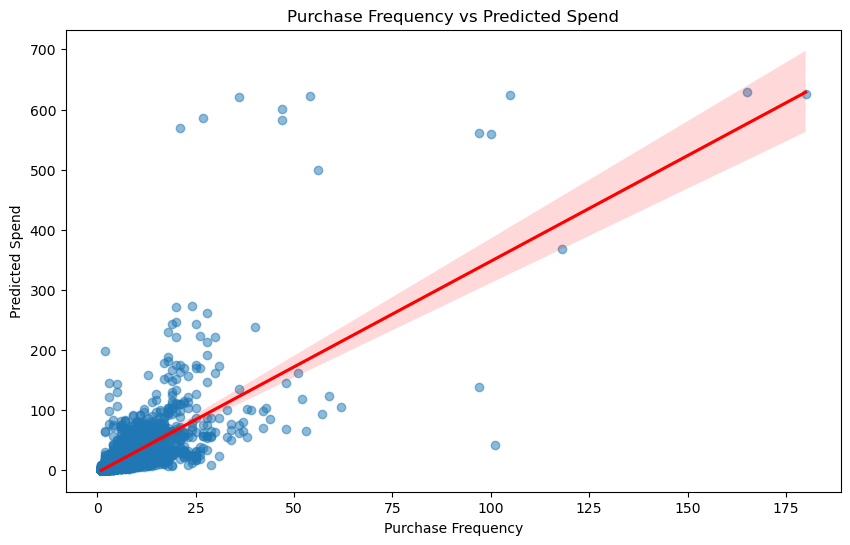

In [5]:
plt.figure(figsize=(10, 6))
sns.regplot(data=clv_df, x='frequency', y='spend_90_total', scatter_kws={'alpha':0.5}, \
             line_kws={'color':'red'})
plt.title('Purchase Frequency vs Predicted Spend', fontsize=12)
plt.xlabel('Purchase Frequency')
plt.ylabel('Predicted Spend')
plt.savefig('../visuals/relationship_btw_predicted_spend_and_frequency.png')

### Customer Segmentation by Value and Frequency

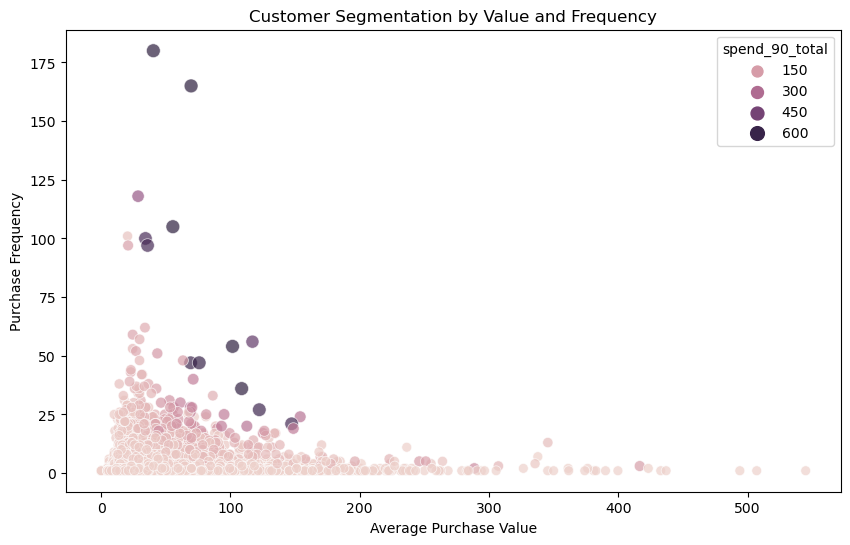

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clv_df, x='price_mean', y='frequency', hue='spend_90_total', size='spend_90_total' \
                , sizes=(50, 100), alpha=0.7)
plt.title('Customer Segmentation by Value and Frequency', fontsize=12)
plt.xlabel('Average Purchase Value')
plt.ylabel('Purchase Frequency')
plt.savefig('../visuals/segmentation_by_value_frequency.png')

### Correlation Heatmap of RMF and Predicted Spend

In [7]:
corr_data = clv_df[['recency', 'frequency', 'price_sum', 'spend_90_total']].corr()

# Heatmap
fig = px.imshow(corr_data, text_auto=True, color_continuous_scale='Blues', 
                title="Correlation Heatmap of RFM Metrics and Predictions", 
                labels=dict(color="Correlation"))
fig.show()

### Distribution of Predicted Purchase Probability

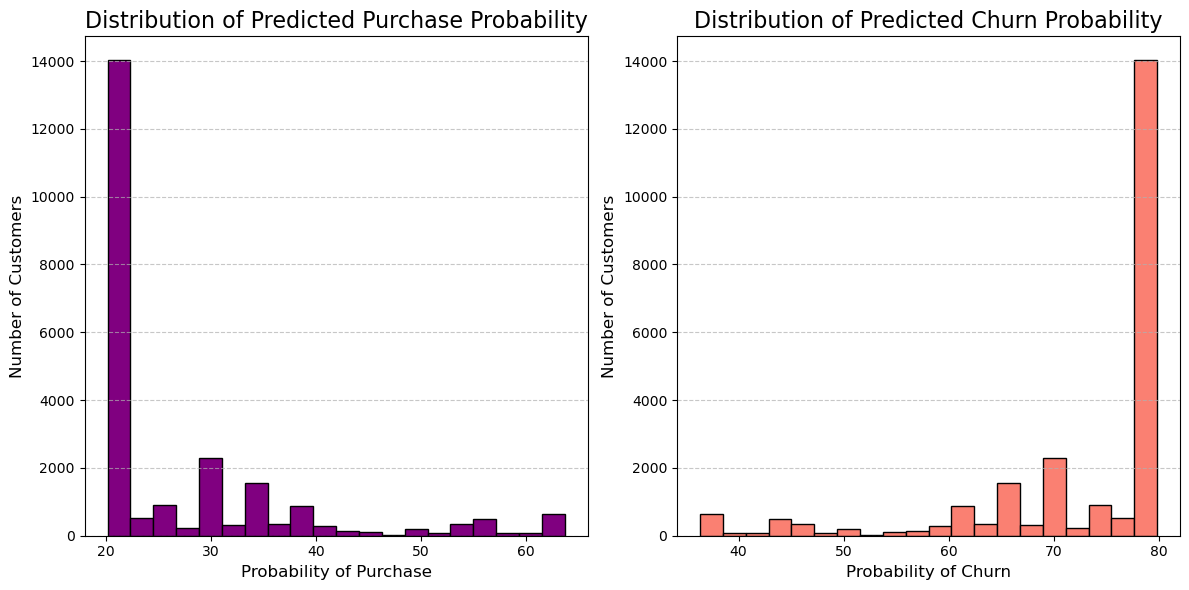

In [8]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(churn_df['spend_90_prob'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Predicted Purchase Probability', fontsize=16)
plt.xlabel('Probability of Purchase', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
plt.hist(churn_df['churn_90_prob'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Predicted Churn Probability', fontsize=16)
plt.xlabel('Probability of Churn', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('../visuals/purchase_and_churn_probability_distribution.png')

### Purchase Probability over RFM Features

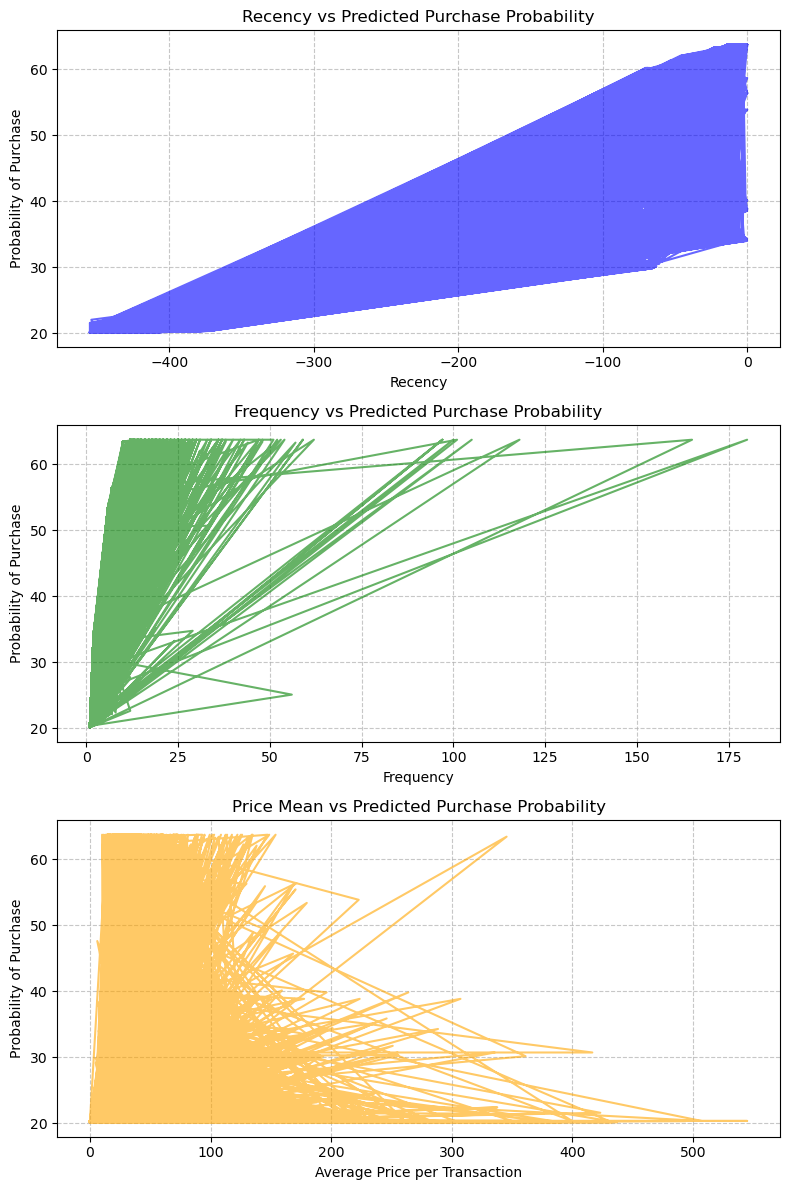

In [12]:
plt.figure(figsize=(8, 12))

plt.subplot(3, 1, 1)
plt.plot(churn_df['recency'], churn_df['spend_90_prob'], alpha=0.6, color='blue')
plt.title('Recency vs Predicted Purchase Probability')
plt.xlabel('Recency')
plt.ylabel('Probability of Purchase')
plt.grid(linestyle='--', alpha=0.7)

plt.subplot(3, 1, 2)
plt.plot(churn_df['frequency'], churn_df['spend_90_prob'], alpha=0.6, color='green')
plt.title('Frequency vs Predicted Purchase Probability')
plt.xlabel('Frequency')
plt.ylabel('Probability of Purchase')
plt.grid(linestyle='--', alpha=0.7)

plt.subplot(3, 1, 3)
plt.plot(churn_df['price_mean'], churn_df['spend_90_prob'], alpha=0.6, color='orange')
plt.title('Price Mean vs Predicted Purchase Probability')
plt.xlabel('Average Price per Transaction')
plt.ylabel('Probability of Purchase')
plt.grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('../visuals/purchase_prob_over_rfm.png')

### Predicted Churn Porbability Correlation Heatmap

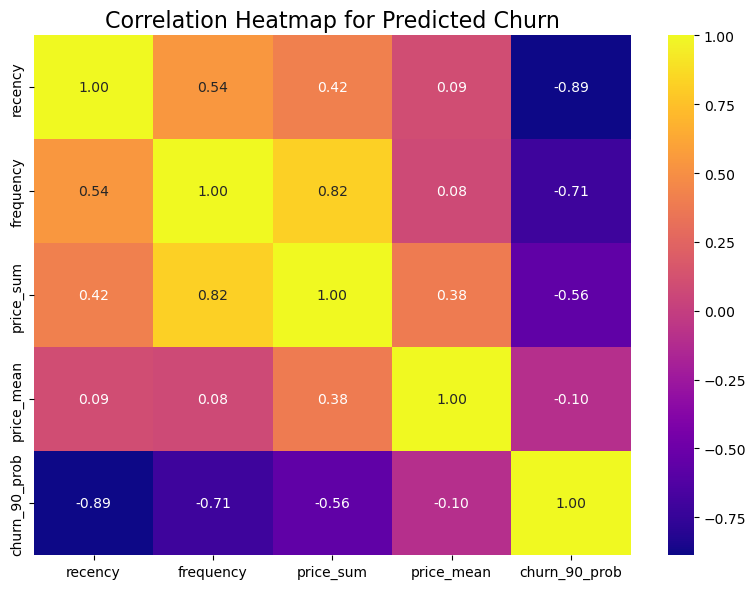

In [10]:
plt.figure(figsize=(8, 6))
correlation_matrix = churn_df[['recency', 'frequency', 'price_sum', 'price_mean', 'churn_90_prob']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='plasma', cbar=True)
plt.title('Correlation Heatmap for Predicted Churn', fontsize=16)
plt.tight_layout()
plt.savefig('../visuals/churn_correlation_heatmap.png')